In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [0]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine( img, ncols = 8, size = 1, path = False ) :
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len( img )
    nrows = int( ceil( nimg/ncols ) )
    fig, axes = plt.subplots( nrows = nrows, ncols = ncols, 
                                      sharex = True, sharey = True, 
                                      figsize = ( ncols*size, nrows*size ) 
                                      )
    
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip( np.arange( nrows ), axes ) :
            nth = r
            if nth < nimg:
                ax.imshow( img[ nth ], cmap = 'rainbow', vmin = 0, vmax = 1 )
                
            ax.set_axis_off( )
    elif nrows == 1 :
        for c, ax in zip( np.arange( ncols ), axes ) :
            nth = c
            if nth < nimg:
                ax.imshow( img[ nth ], cmap = 'rainbow', vmin = 0, vmax = 1 )
            ax.set_axis_off( )
    else:
        for r, row in zip( np.arange( nrows ), axes ) :
            for c, ax in zip( np.arange( ncols ), row ) :
                nth = r*ncols + c
                if nth < nimg:
                    ax.imshow( img[ nth ], cmap = 'rainbow', vmin = 0, vmax = 1 )
                ax.set_axis_off( )
    plt.show( )

In [0]:
# 讀取 Cifar-10 資料集
( x_train, y_train ), ( x_test, y_test ) = cifar10.load_data( )

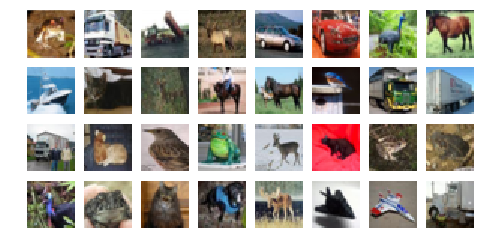

In [0]:
# 取前 32 張圖片做視覺化
images = x_train[ :32 ]
img_combine( images )

In [0]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator( rotation_range = 20,
                                                        width_shift_range = 0.2,
                                                        height_shift_range = 0.2,
                                                        horizontal_flip = True 
                                                        )

## 注意 : ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。  


## 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 

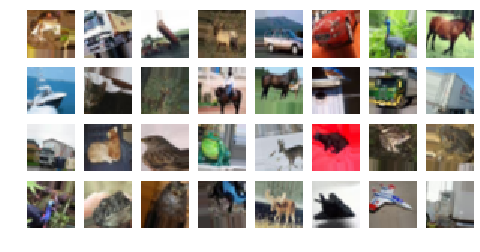

In [0]:
augmented_iamges = next( data_generator.flow( images, shuffle = False ) )
img_combine( augmented_iamges.astype( "int" ) ) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

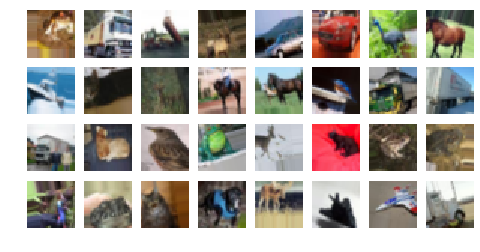

In [0]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next( data_generator.flow( images, shuffle = False ) )
img_combine( augmented_iamges.astype( "int" ) )

# 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [1]:
import os
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop, Adam

Using TensorFlow backend.


## 資料前處理 - 獨熱編碼(OneHot Encoding)

In [2]:
# 讀取資料並檢視
( x_train, y_train ), ( x_test, y_test ) = cifar10.load_data( )
print( 'x_train shape : ', x_train.shape )
print( x_train.shape[0], 'train samples' )
print( x_test.shape[0], 'test samples' )

170500096/170498071 [==============================] - 4s 0us/step
x_train shape :  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
num_classes = 10
y_train = keras.utils.to_categorical( y_train, num_classes )
y_test = keras.utils.to_categorical( y_test, num_classes )

## Data Augmentation

In [0]:
Data_Aug = ImageDataGenerator( featurewise_center = True,                 # 將資料的均值設為 0
                                                featurewise_std_normalization = True,  # 資料標準化
                                                rotation_range = 20,                           # 隨機旋轉度數的範圍
                                                width_shift_range = 0.2,
                                                height_shift_range = 0.2,
                                                horizontal_flip = True,                          # 隨機水平翻轉
                                                vertical_flip = False                             # 隨機垂直翻轉
                                                )

## Build CNN Model

In [5]:
model = Sequential( )
model.add( Conv2D( 32, ( 3, 3 ), 
                             padding = 'same',
                             input_shape = x_train.shape[ 1: ] 
                             ) )

model.add( Activation( 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ) ) )
model.add( Activation( 'relu' ) )
model.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )
model.add( Dropout( rate = 0.25 ) )

model.add( Conv2D( 64, ( 3, 3 ), padding = 'same' ) )
model.add( Activation( 'relu' ) )
model.add( Conv2D( 64, ( 3, 3 ) ) )
model.add( Activation( 'relu' ) )
model.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )
model.add( Dropout( rate = 0.25 ) )

model.add( Flatten( ) )
model.add( Dense( 512 ) )
model.add( Activation( 'relu' ) )
model.add( Dropout( rate = 0.5 ) )
model.add( Dense( num_classes ) )
model.add( Activation( 'softmax' ) )
model.summary( )

W0807 16:31:25.554165 140263111284608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 16:31:25.612956 140263111284608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 16:31:25.627347 140263111284608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 16:31:25.712273 140263111284608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0807 16:31:25.718038 140263111284608 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

## Set Hyper-parameters

In [0]:
Batch_Size = 128 
Epochs = 10 

## Train CNN Model

In [8]:
model.compile( loss = 'categorical_crossentropy',
                      optimizer = RMSprop( ),
                      metrics = [ 'accuracy' ] 
                      )

Data_Aug.fit( x_train )

history = model.fit_generator( Data_Aug.flow( x_train, y_train, batch_size = Batch_Size ),
                                          steps_per_epoch = x_train.shape[0] // Batch_Size,
                                          epochs = Epochs,
                                          verbose = 1,
                                          validation_data = ( x_test, y_test ) 
                                          )

score = model.evaluate( x_test, y_test, verbose = 0 )


print( 'Test Loss:', score[0] )
print( 'Test Accuracy:', score[1] )

W0807 16:32:26.851773 140263111284608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
390/390 [==============================] - 259s 664ms/step - loss: 1.8243 - acc: 0.3310 - val_loss: 10.4956 - val_acc: 0.3144
Epoch 2/10
390/390 [==============================] - 259s 664ms/step - loss: 1.5292 - acc: 0.4494 - val_loss: 11.9690 - val_acc: 0.2419
Epoch 3/10
390/390 [==============================] - 259s 663ms/step - loss: 1.3998 - acc: 0.5006 - val_loss: 11.4899 - val_acc: 0.2704
Epoch 4/10
390/390 [==============================] - 257s 659ms/step - loss: 1.3281 - acc: 0.5296 - val_loss: 11.1540 - val_acc: 0.2840
Epoch 5/10
390/390 [==============================] - 258s 662ms/step - loss: 1.2702 - acc: 0.5505 - val_loss: 10.3026 - val_acc: 0.3315
Epoch 6/10
390/390 [==============================] - 258s 661ms/step - loss: 1.2277 - acc: 0.5691 - val_loss: 12.6899 - val_acc: 0.1984
Epoch 7/10
390/390 [==============================] - 258s 663ms/step - loss: 1.1830 - acc: 0.5872 - val_loss: 10.6471 - val_acc: 0.3136
Epoch 8/10
390/390 [=====================